In [1]:
data_dir = '../input/data'
new_data_dir = '../input/data_img64_nonpad'
from copy import copy
import PIL.Image as Image
import os
import torchvision.transforms.functional as F
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm

In [2]:
def squarepad(image):
    w, h = image.size
    max_wh = np.max([w, h])
    hp = int((max_wh - w) / 2)
    vp = int((max_wh - h) / 2)
    padding = (hp, vp, hp, vp)
    img = F.pad(image, padding, 0, "constant")
    return img

In [3]:

tasks = os.listdir(data_dir)
for task in tasks:
    task_path = os.path.join(data_dir, task)
    profiles = os.listdir(task_path)

    for profile in profiles:
        train_path = os.path.join(task_path, profile)
        new_train_path = os.path.join(new_data_dir, task, profile)
        file_names = os.listdir(train_path)
        new_file_names = copy(file_names)
        os.makedirs(new_train_path, exist_ok=True)
#         print(train_path)
        for file_name in tqdm(file_names):
            img_path = os.path.join(task_path, profile, file_name)
            new_img_path = os.path.join(new_data_dir, task, profile, file_name)
            image = Image.open(img_path)
#            image = squarepad(image)
            image = image.resize((64, 64), Image.BILINEAR)
            image.save(new_img_path)


100%|██████████| 8159/8159 [03:29<00:00, 38.87it/s]


In [108]:
image_ratios = {
    'Battery' : [],
    'Clothing' : [],
    'Glass' : [],
    'Metal' : [],
    'Paper' : [],
    'Paperpack' : [],
    'Plastic' : [],
    'Plasticbag' : [],
    'Styrofoam' : [],
}
tasks = os.listdir(data_dir)
for task in tasks:
    task_path = os.path.join(data_dir, task)
    profiles = os.listdir(task_path)

    for profile in profiles:
        train_path = os.path.join(task_path, profile)
        new_train_path = os.path.join(new_data_dir, task, profile)
        file_names = os.listdir(train_path)
        new_file_names = copy(file_names)
        os.makedirs(new_train_path, exist_ok=True)
        for file_name in tqdm(file_names):
            img_path = os.path.join(task_path, profile, file_name)
            new_img_path = os.path.join(new_data_dir, task, profile, file_name)
            image = Image.open(img_path)
            if image.size[0] > image.size[1]:
                image_ratios[profile].append(image.size[1]/image.size[0])
            else :
                image_ratios[profile].append(image.size[0]/image.size[1])
#                 image = squarepad(image)
                image = image.resize((80, 80), Image.BILINEAR)

                image.save(new_img_path)


100%|██████████| 1669/1669 [00:00<00:00, 10681.63it/s]


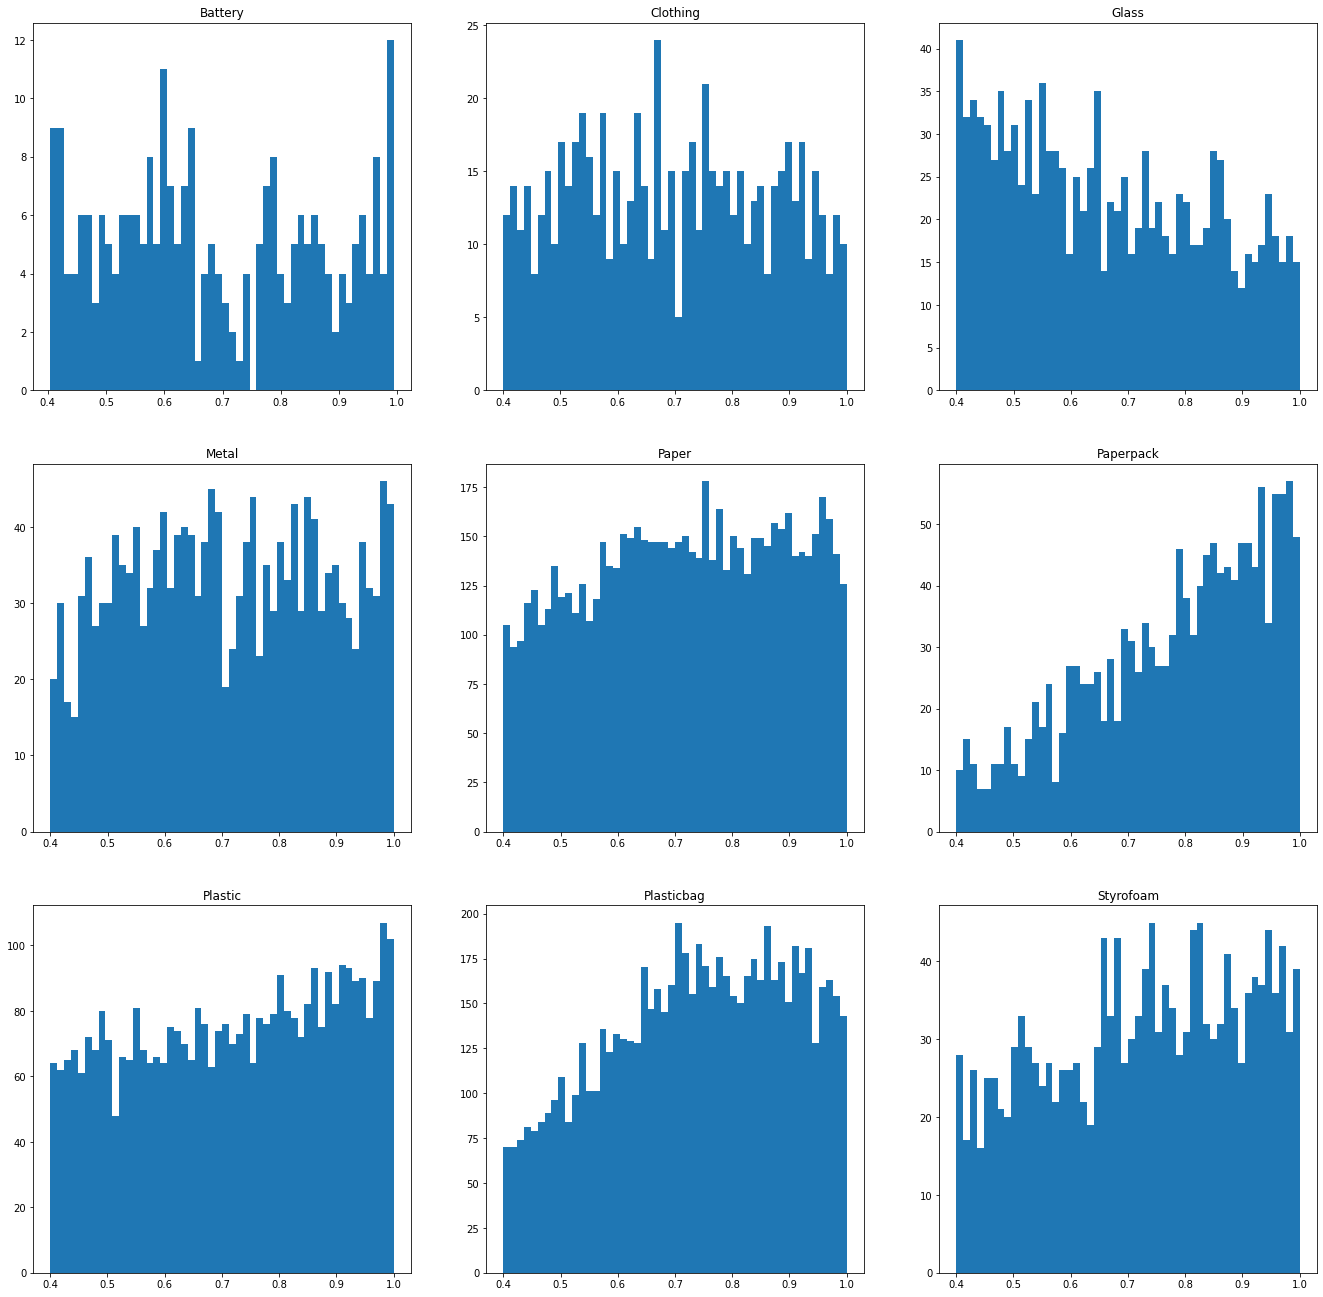

In [109]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(23,23))
ax =[]
for i in range(9):
    ax.append(fig.add_subplot(3, 3, i+1))

ax[0].hist(image_ratios['Battery'], bins=50)
ax[0].set_title('Battery')
ax[1].hist(image_ratios['Clothing'], bins=50)
ax[1].set_title('Clothing')
ax[2].hist(image_ratios['Glass'], bins=50)
ax[2].set_title('Glass')
ax[3].hist(image_ratios['Metal'], bins=50)
ax[3].set_title('Metal')
ax[4].hist(image_ratios['Paper'], bins=50)
ax[4].set_title('Paper')
ax[5].hist(image_ratios['Paperpack'], bins=50)
ax[5].set_title('Paperpack')
ax[6].hist(image_ratios['Plastic'], bins=50)
ax[6].set_title('Plastic')
ax[7].hist(image_ratios['Plasticbag'], bins=50)
ax[7].set_title('Plasticbag')
ax[8].hist(image_ratios['Styrofoam'], bins=50)
ax[8].set_title('Styrofoam')
plt.show()
# print(min(image_ratios))

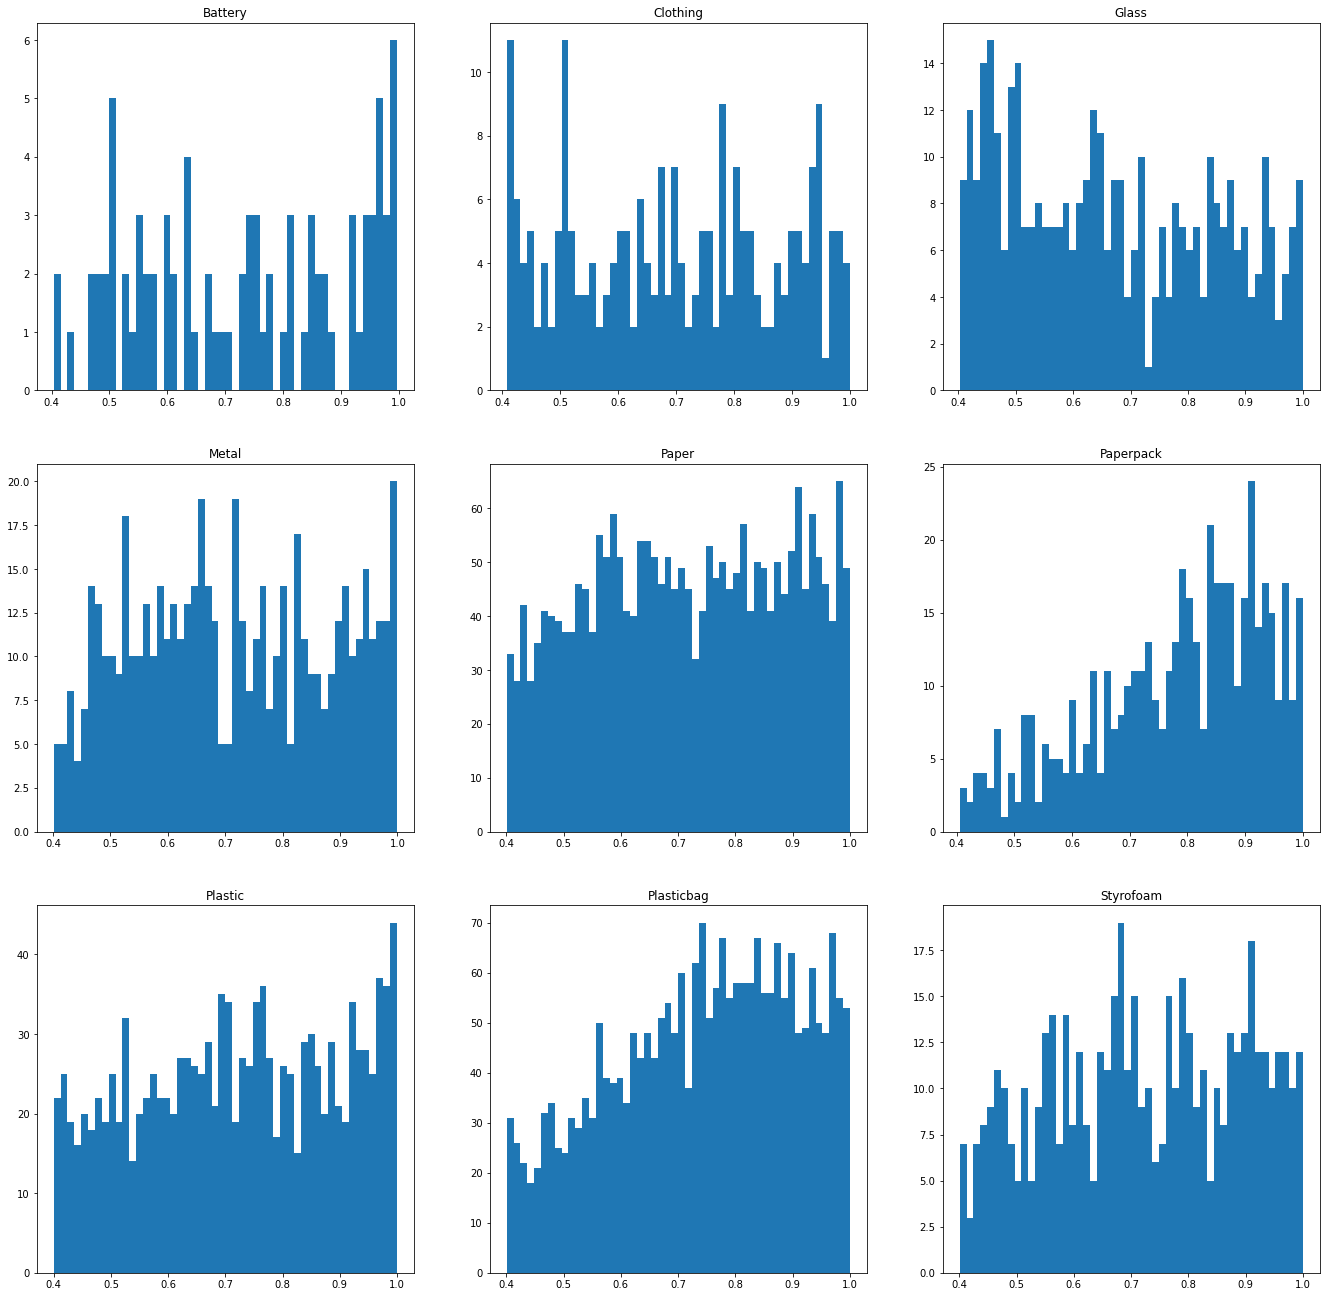

In [107]:
fig = plt.figure(figsize=(23,23))
ax =[]
for i in range(9):
    ax.append(fig.add_subplot(3, 3, i+1))

ax[0].hist(image_ratios['Battery'], bins=50)
ax[0].set_title('Battery')
ax[1].hist(image_ratios['Clothing'], bins=50)
ax[1].set_title('Clothing')
ax[2].hist(image_ratios['Glass'], bins=50)
ax[2].set_title('Glass')
ax[3].hist(image_ratios['Metal'], bins=50)
ax[3].set_title('Metal')
ax[4].hist(image_ratios['Paper'], bins=50)
ax[4].set_title('Paper')
ax[5].hist(image_ratios['Paperpack'], bins=50)
ax[5].set_title('Paperpack')
ax[6].hist(image_ratios['Plastic'], bins=50)
ax[6].set_title('Plastic')
ax[7].hist(image_ratios['Plasticbag'], bins=50)
ax[7].set_title('Plasticbag')
ax[8].hist(image_ratios['Styrofoam'], bins=50)
ax[8].set_title('Styrofoam')
plt.show()
# print(min(image_ratios))

In [105]:
image_ratios = {
    'Battery' : [],
    'Clothing' : [],
    'Glass' : [],
    'Metal' : [],
    'Paper' : [],
    'Paperpack' : [],
    'Plastic' : [],
    'Plasticbag' : [],
    'Styrofoam' : [],
}
tasks = os.listdir(data_dir)
for task in tasks:
    task_path = os.path.join(data_dir, task)
    profiles = os.listdir(task_path)
    if task == 'val':
        for profile in profiles:
            train_path = os.path.join(task_path, profile)
            new_train_path = os.path.join(new_data_dir, task, profile)
            file_names = os.listdir(train_path)
            new_file_names = copy(file_names)
            os.makedirs(new_train_path, exist_ok=True)
            for file_name in tqdm(file_names):
                img_path = os.path.join(task_path, profile, file_name)
        #             new_img_path = os.path.join(new_data_dir, task, profile, file_name)
                image = Image.open(img_path)
                if image.size[0] > image.size[1]:
                    image_ratios[profile].append(image.size[1]/image.size[0])
                else :
                    image_ratios[profile].append(image.size[0]/image.size[1])
        #             image = squarepad(image)
        #             image = image.resize((80, 80), Image.BILINEAR)

        #             image.save(new_img_path)


100%|██████████| 556/556 [00:00<00:00, 10685.00it/s]


In [121]:
image_ratios = []
tasks = os.listdir(data_dir)
for task in tasks:
    task_path = os.path.join(data_dir, task)
    profiles = os.listdir(task_path)
    if task == 'test':
        for profile in profiles:
            train_path = os.path.join(task_path, profile)
            new_train_path = os.path.join(new_data_dir, task, profile)
            file_names = os.listdir(train_path)
            new_file_names = copy(file_names)
#             os.makedirs(new_train_path, exist_ok=True)
            for file_name in tqdm(file_names):
                img_path = os.path.join(task_path, profile, file_name)
        #             new_img_path = os.path.join(new_data_dir, task, profile, file_name)
                image = Image.open(img_path)
                if image.size[0] > image.size[1]:
                    image_ratios.append(image.size[1]/image.size[0])
                else :
                    image_ratios.append(image.size[0]/image.size[1])
        #             image = squarepad(image)
        #             image = image.resize((80, 80), Image.BILINEAR)

        #             image.save(new_img_path)


100%|██████████| 8159/8159 [00:00<00:00, 10805.16it/s]


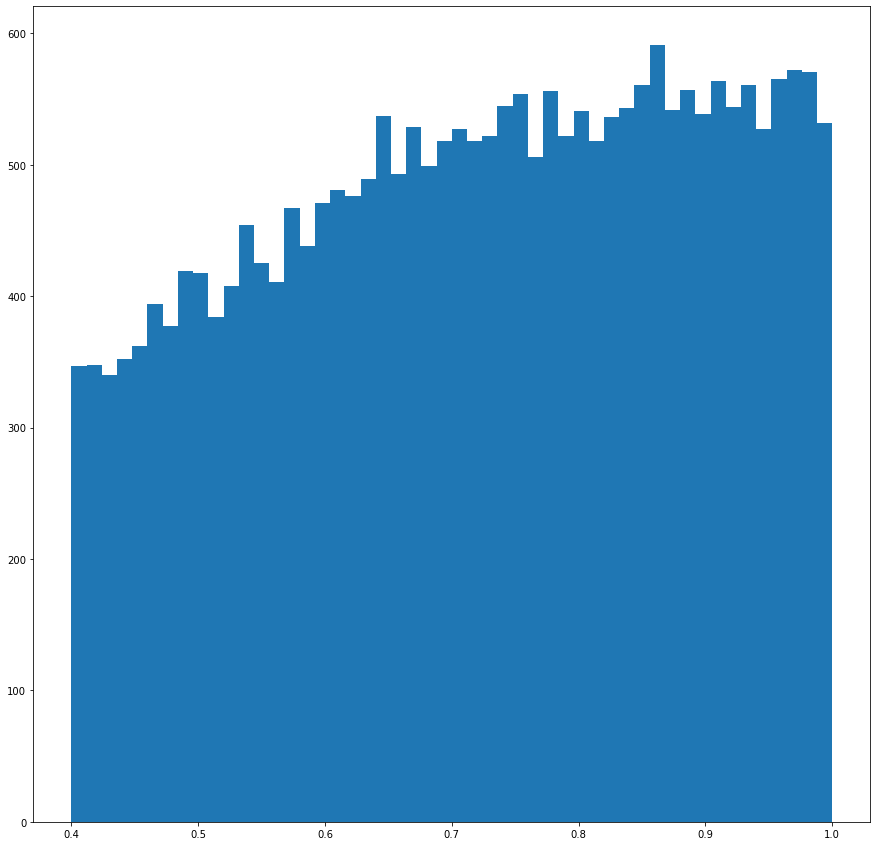

In [120]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)
ax.hist(image_ratios, bins=50)
plt.show()

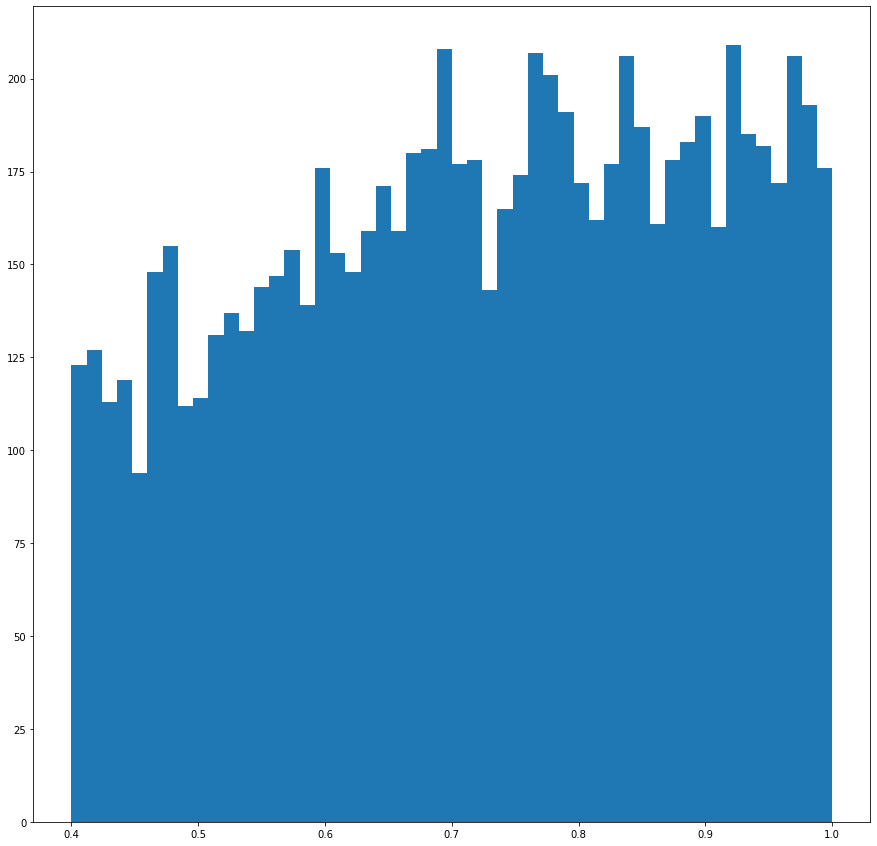

In [122]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)
ax.hist(image_ratios, bins=50)
plt.show()